In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import datetime
import json
import statsmodels.api as sm
import math

In [6]:
df = pd.read_csv('data/Portfolios_Formed_on_ME.CSV', header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Value Weight Returns -- Monthly,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1,192607,-99.99,0.14,1.54,3.42,0.37,0.48,1.68,1.41,3.67,-0.12,0.52,-0.05,0.82,1.39,1.89,1.62,1.29,3.53,3.71
2,192608,-99.99,3.19,2.73,2.91,2.21,3.58,3.70,1.50,3.07,1.13,2.55,4.00,3.32,2.76,4.41,1.54,1.49,0.61,3.79
3,192609,-99.99,-1.73,-0.88,0.80,-1.39,-1.25,0.07,-0.23,0.81,0.59,-2.00,-2.01,-0.77,-0.01,0.13,-1.93,0.74,-0.77,1.25
4,192610,-99.99,-2.94,-3.26,-2.79,-2.56,-3.99,-2.65,-3.36,-2.74,-4.29,-2.01,-3.25,-4.45,-3.02,-2.39,-3.55,-3.26,-3.36,-2.56


In [38]:
index = df.index
start_idxs = []
for i in index:
    if 'Returns' in str(df.iloc[i,0]):
        start_idxs.append(i)
start_idxs

[0, 1162, 2324, 2421]

In [50]:
vw_monthly = df.iloc[0:1162]
vwm_ar = vw_monthly.to_numpy()
vwm_header = list(vwm_ar[0])
vwm_ar = vwm_ar[1:]
vw_monthly = pd.DataFrame(data=vwm_ar,columns=vwm_header)
index = vw_monthly.index
years = []
months = []

for i in index:
    ym_str = vw_monthly.iloc[i,0]
    year = ym_str[:4]
    month = ym_str[4:]
    years.append(int(year))
    months.append(int(month))

vw_monthly['Year'] = pd.Series(years,index=index)
vw_monthly['Month'] = pd.Series(months,index=index)
vw_monthly.drop(columns=['Value Weight Returns -- Monthly', '<= 0'],inplace=True)
vw_monthly.head()    

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Year,Month
0,0.14,1.54,3.42,0.37,0.48,1.68,1.41,3.67,-0.12,0.52,-0.05,0.82,1.39,1.89,1.62,1.29,3.53,3.71,1926,7
1,3.19,2.73,2.91,2.21,3.58,3.70,1.50,3.07,1.13,2.55,4.00,3.32,2.76,4.41,1.54,1.49,0.61,3.79,1926,8
2,-1.73,-0.88,0.80,-1.39,-1.25,0.07,-0.23,0.81,0.59,-2.00,-2.01,-0.77,-0.01,0.13,-1.93,0.74,-0.77,1.25,1926,9
3,-2.94,-3.26,-2.79,-2.56,-3.99,-2.65,-3.36,-2.74,-4.29,-2.01,-3.25,-4.45,-3.02,-2.39,-3.55,-3.26,-3.36,-2.56,1926,10
4,-0.38,3.73,2.74,-0.95,3.03,3.50,3.25,2.71,-3.28,-0.23,0.08,4.90,3.56,3.45,3.60,3.05,3.86,2.40,1926,11


In [52]:
ew_monthly = df.iloc[1162:2324]
ewm_ar = ew_monthly.to_numpy()
ewm_header = list(ewm_ar[0])
ewm_ar = ewm_ar[1:]
ew_monthly = pd.DataFrame(data=ewm_ar,columns=ewm_header)
index = ew_monthly.index
years = []
months = []

for i in index:
    ym_str = ew_monthly.iloc[i,0]
    year = ym_str[:4]
    month = ym_str[4:]
    years.append(int(year))
    months.append(int(month))

ew_monthly['Year'] = pd.Series(years,index=index)
ew_monthly['Month'] = pd.Series(months,index=index)
ew_monthly.drop(columns=['Equal Weight Returns -- Monthly', '<= 0'],inplace=True)
ew_monthly.head()    

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Year,Month
0,-0.43,1.45,2.68,-0.57,0.37,1.65,1.50,3.33,-1.42,0.29,-0.15,0.88,1.45,1.85,1.63,1.38,3.38,3.29,1926,7
1,3.74,3.03,2.09,3.60,3.64,3.66,1.58,2.33,4.61,2.59,4.03,3.24,2.66,4.67,1.54,1.63,0.98,3.70,1926,8
2,-1.07,-0.59,0.16,-0.48,-1.55,0.03,-0.47,-0.09,0.91,-1.87,-2.27,-0.84,0.12,-0.07,-1.58,0.64,-0.86,0.67,1926,9
3,-3.29,-3.56,-3.06,-3.25,-4.18,-2.90,-3.36,-2.95,-4.72,-1.77,-3.36,-5.01,-3.09,-2.71,-3.45,-3.27,-3.47,-2.43,1926,10
4,-0.46,3.83,3.09,-0.54,2.25,3.37,3.37,3.16,-0.77,-0.32,-0.29,4.79,3.17,3.58,3.80,2.95,3.61,2.70,1926,11


In [53]:
vw_ann = df.iloc[2324:2421]
vw_ar = vw_ann.to_numpy()
vw_header = list(vw_ar[0])
vw_ar = vw_ar[1:]
vw_ann = pd.DataFrame(data=vw_ar,columns=vw_header)
index = vw_ann.index
years = []


for i in index:
    ym_str = vw_ann.iloc[i,0]
    year = ym_str[:]
    years.append(int(year))

vw_ann['Year'] = pd.Series(years,index=index)
vw_ann.drop(columns=[vw_header[0], '<= 0'],inplace=True)
vw_ann.head() 

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Year
0,36.37,35.29,33.36,33.75,36.90,33.80,32.44,33.73,34.38,33.34,38.05,36.24,17.98,45.62,36.61,30.14,32.05,34.19,1927
1,43.10,41.82,37.74,48.52,35.74,44.22,40.32,37.55,59.91,44.49,38.36,33.30,39.18,47.78,41.72,39.50,37.26,37.62,1928
2,-47.83,-27.75,-10.29,-48.33,-37.46,-30.16,-23.73,-8.87,-46.61,-48.87,-47.93,-30.70,-34.16,-27.41,-24.35,-23.47,-7.46,-9.21,1929
3,-45.46,-36.44,-27.33,-50.18,-41.40,-33.35,-36.00,-26.69,-50.03,-50.23,-42.08,-40.97,-31.84,-34.33,-38.50,-34.63,-37.66,-24.02,1930
4,-47.86,-45.94,-43.87,-52.32,-45.13,-48.78,-45.80,-43.64,-44.66,-54.87,-44.77,-45.37,-48.50,-48.96,-43.62,-46.98,-51.08,-42.18,1931


In [56]:
ew_ann = df.iloc[2421:2421+98]
ew_ar = ew_ann.to_numpy()
ew_header = [list(ew_ar[0])[0]] + list(ew_ar[1])[1:]
ew_ar = ew_ar[2:]
ew_ann = pd.DataFrame(data=ew_ar,columns=ew_header)
index = vw_ann.index
years = []

for i in index:
    ym_str = ew_ann.iloc[i,0]
    year = ym_str[:]
    years.append(int(year))

ew_ann['Year'] = pd.Series(years,index=index)
ew_ann.drop(columns=[ew_header[0], '<= 0'],inplace=True)
ew_ann.head() 

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Year
0,35.70,30.65,29.26,37.69,31.11,28.06,32.32,29.62,43.45,31.70,31.57,30.43,17.89,39.18,36.14,28.51,29.98,29.12,1927
1,55.35,37.19,35.81,65.81,32.61,40.79,37.33,35.63,87.08,46.51,36.15,28.80,35.61,46.18,38.57,36.01,34.61,36.53,1928
2,-46.50,-31.01,-14.24,-46.13,-40.10,-32.72,-25.97,-8.13,-42.33,-49.85,-47.38,-32.20,-35.24,-30.17,-26.40,-25.59,-7.09,-9.16,1929
3,-44.04,-37.46,-33.06,-45.24,-42.54,-33.36,-35.69,-33.68,-45.25,-45.55,-41.78,-43.36,-31.02,-35.68,-39.33,-31.93,-39.28,-27.82,1930
4,-41.25,-46.35,-47.10,-41.91,-42.17,-48.38,-45.35,-47.65,-33.70,-48.97,-40.17,-44.22,-47.55,-49.24,-44.77,-46.03,-50.47,-44.77,1931


# Read in Kenneth French's data on Size factor. The four dataframes differ based on the type of portfolio weighting (value or equal) and the type of return (annual or monthly). The columns of each of the dataframes (other than 'Year') correrspond to the specified return of a portfolio of some subset of equities sorted by Market Cap

# Examine Value Weighted monthly returns

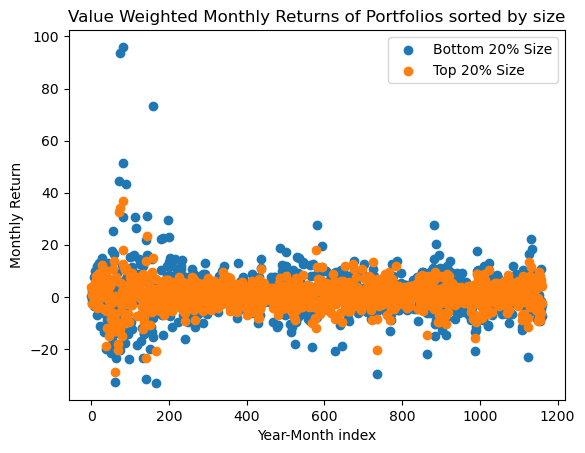

In [73]:
index = vw_monthly.index
x = []
lowest_quint = []
highest_quint = []
for i in index:
    x.append(i)
    lowest_quint.append(float(vw_monthly.iloc[i,:]['Lo 20']))
    highest_quint.append(float(vw_monthly.iloc[i,:]['Hi 20']))

plt.scatter(x,lowest_quint,label='Bottom 20% Size')
plt.scatter(x,highest_quint,label='Top 20% Size')
plt.xlabel('Year-Month index')
plt.ylabel('Monthly Return')
plt.title('Value Weighted Monthly Returns of Portfolios sorted by size')
plt.legend()

Text(0.5, 1.0, 'Lowest 20% vs Top 20%')

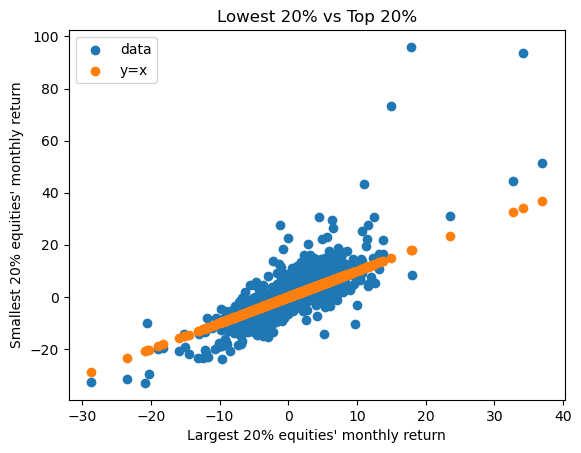

In [74]:
plt.scatter(highest_quint,lowest_quint,label='data')
plt.scatter(highest_quint,highest_quint,label='y=x')
plt.xlabel('Largest 20% equities\' monthly return')
plt.ylabel('Smallest 20% equities\' monthly return')
plt.legend()
plt.title('Lowest 20% vs Top 20%')

Text(0.5, 1.0, 'Residual Plot')

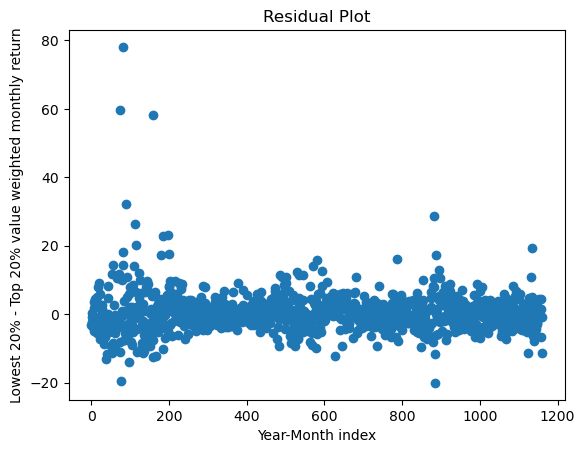

In [75]:
residuals = np.array(lowest_quint) - np.array(highest_quint)
plt.scatter(x,residuals)
plt.xlabel('Year-Month index')
plt.ylabel('Lowest 20% - Top 20% value weighted monthly return')
plt.title('Residual Plot')

# Examine Equal Weighted monthly returns

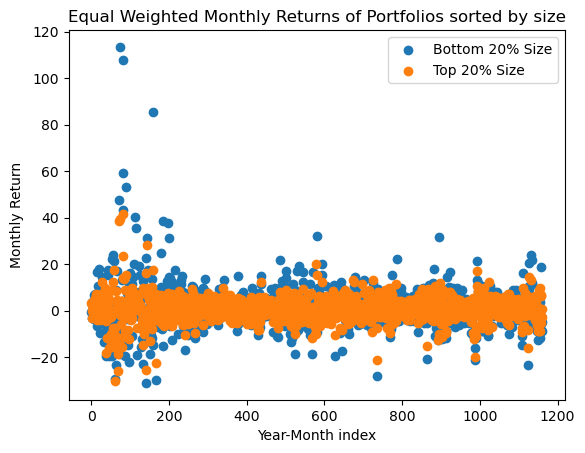

In [77]:
index = ew_monthly.index
x = []
lowest_quint = []
highest_quint = []
for i in index:
    x.append(i)
    lowest_quint.append(float(ew_monthly.iloc[i,:]['Lo 20']))
    highest_quint.append(float(ew_monthly.iloc[i,:]['Hi 20']))

plt.scatter(x,lowest_quint,label='Bottom 20% Size')
plt.scatter(x,highest_quint,label='Top 20% Size')
plt.xlabel('Year-Month index')
plt.ylabel('Monthly Return')
plt.title('Equal Weighted Monthly Returns of Portfolios sorted by size')
plt.legend()

Text(0.5, 1.0, 'Lowest 20% vs Top 20%')

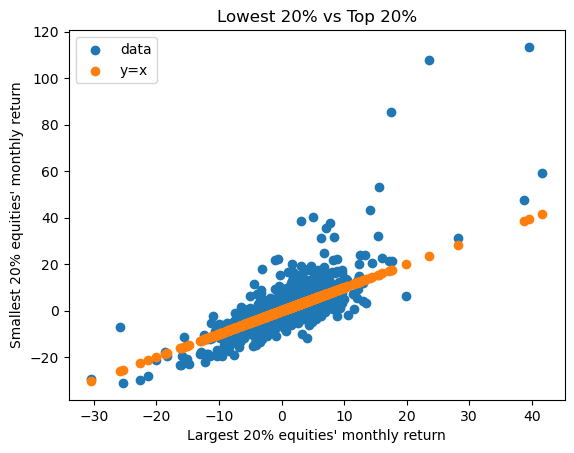

In [78]:
plt.scatter(highest_quint,lowest_quint,label='data')
plt.scatter(highest_quint,highest_quint,label='y=x')
plt.xlabel('Largest 20% equities\' monthly return')
plt.ylabel('Smallest 20% equities\' monthly return')
plt.legend()
plt.title('Lowest 20% vs Top 20%')

Text(0.5, 1.0, 'Residual Plot')

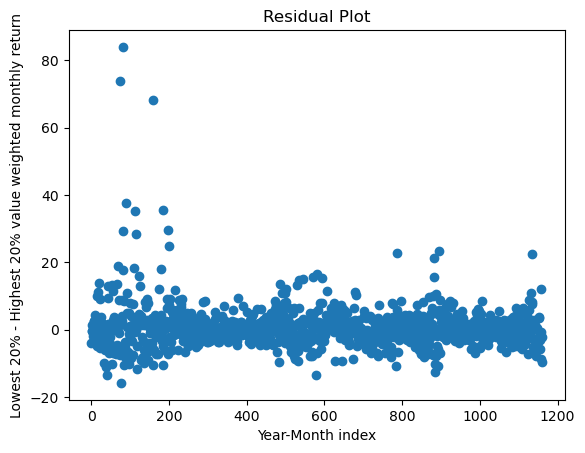

In [79]:
residuals = np.array(lowest_quint) - np.array(highest_quint)
plt.scatter(x,residuals)
plt.xlabel('Year-Month index')
plt.ylabel('Lowest 20% - Highest 20% value weighted monthly return')
plt.title('Residual Plot')

# For monthly returns, the evidence of a size premium isn't so strong when comparing the lowest and highest market cap quintiles. 

# Analyze Value-Weighted Annual Returns

In [80]:
vw_ann.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Year
0,36.37,35.29,33.36,33.75,36.90,33.80,32.44,33.73,34.38,33.34,38.05,36.24,17.98,45.62,36.61,30.14,32.05,34.19,1927
1,43.10,41.82,37.74,48.52,35.74,44.22,40.32,37.55,59.91,44.49,38.36,33.30,39.18,47.78,41.72,39.50,37.26,37.62,1928
2,-47.83,-27.75,-10.29,-48.33,-37.46,-30.16,-23.73,-8.87,-46.61,-48.87,-47.93,-30.70,-34.16,-27.41,-24.35,-23.47,-7.46,-9.21,1929
3,-45.46,-36.44,-27.33,-50.18,-41.40,-33.35,-36.00,-26.69,-50.03,-50.23,-42.08,-40.97,-31.84,-34.33,-38.50,-34.63,-37.66,-24.02,1930
4,-47.86,-45.94,-43.87,-52.32,-45.13,-48.78,-45.80,-43.64,-44.66,-54.87,-44.77,-45.37,-48.50,-48.96,-43.62,-46.98,-51.08,-42.18,1931


In [89]:
index = vw_ann.index
x = []
lq = []
hq = []
for i in index:
    row = vw_ann.iloc[i,:]
    x.append(row['Year'])
    lq.append(float(row['Lo 20']))
    hq.append(float(row['Hi 20']))

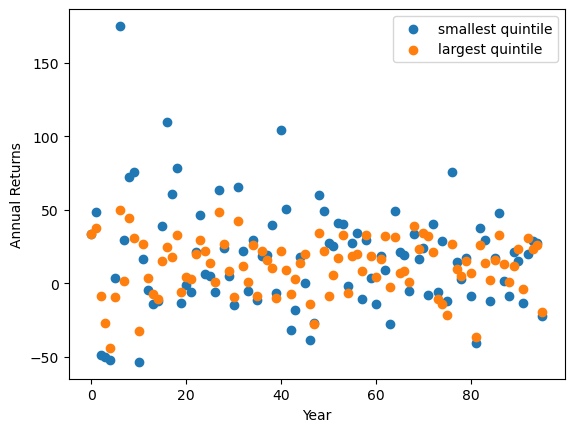

In [90]:
plt.scatter(index,lq,label='smallest quintile')
plt.scatter(index,hq,label='largest quintile')
plt.xlabel('Year')
plt.ylabel('Annual Returns')
plt.legend()

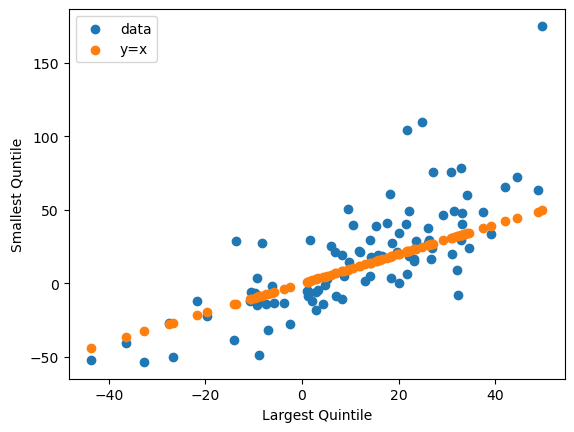

In [91]:
plt.scatter(hq,lq,label='data')
plt.scatter(hq,hq,label='y=x')
plt.xlabel('Largest Quintile')
plt.ylabel('Smallest Quntile')
plt.legend()

# Analyze equal weighted annual returns

In [85]:
ew_ann.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Year
0,35.70,30.65,29.26,37.69,31.11,28.06,32.32,29.62,43.45,31.70,31.57,30.43,17.89,39.18,36.14,28.51,29.98,29.12,1927
1,55.35,37.19,35.81,65.81,32.61,40.79,37.33,35.63,87.08,46.51,36.15,28.80,35.61,46.18,38.57,36.01,34.61,36.53,1928
2,-46.50,-31.01,-14.24,-46.13,-40.10,-32.72,-25.97,-8.13,-42.33,-49.85,-47.38,-32.20,-35.24,-30.17,-26.40,-25.59,-7.09,-9.16,1929
3,-44.04,-37.46,-33.06,-45.24,-42.54,-33.36,-35.69,-33.68,-45.25,-45.55,-41.78,-43.36,-31.02,-35.68,-39.33,-31.93,-39.28,-27.82,1930
4,-41.25,-46.35,-47.10,-41.91,-42.17,-48.38,-45.35,-47.65,-33.70,-48.97,-40.17,-44.22,-47.55,-49.24,-44.77,-46.03,-50.47,-44.77,1931


In [92]:
index = ew_ann.index
lq = []
hq = []
for i in index:
    row = ew_ann.iloc[i,:]
    lq.append(float(row['Lo 20']))
    hq.append(float(row['Hi 20']))

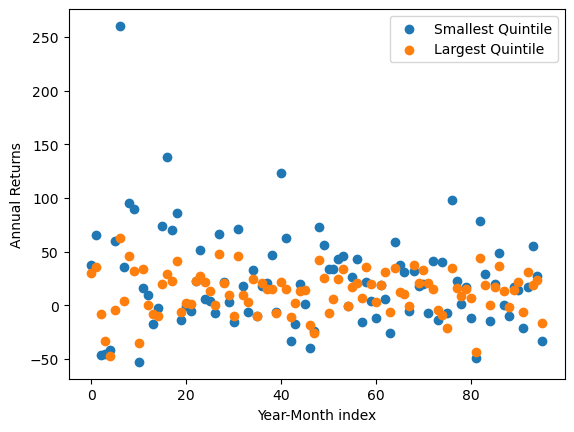

In [93]:
plt.scatter(index,lq,label='Smallest Quintile')
plt.scatter(index,hq,label='Largest Quintile')
plt.xlabel('Year-Month index')
plt.ylabel('Annual Returns')
plt.legend()

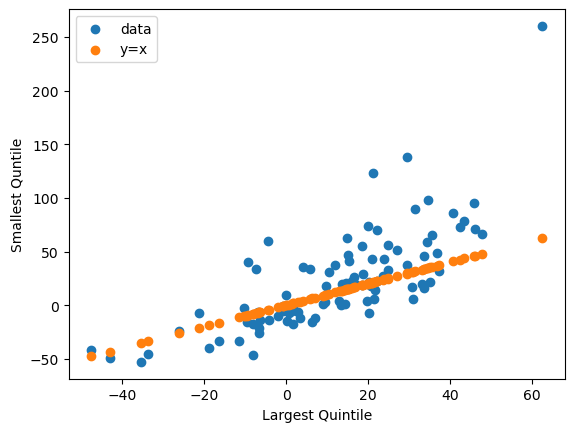

In [94]:
plt.scatter(hq,lq,label='data')
plt.scatter(hq,hq,label='y=x')
plt.xlabel('Largest Quintile')
plt.ylabel('Smallest Quntile')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


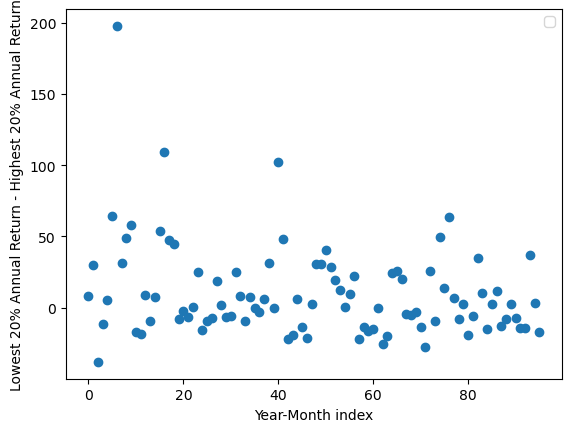

In [95]:
residuals = np.array(lq)-np.array(hq)
plt.scatter(index,residuals)
plt.xlabel('Year-Month index')
plt.ylabel('Lowest 20% Annual Return - Highest 20% Annual Return')
plt.legend()

# There's some evidence of a size premium but it's not so convincing